# 6 Outliers

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # to suppress a numpy warning
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#dealing with missing data
sufficientcolumns = df.isnull().sum() < 2
df = df.loc[:, sufficientcolumns] # keep only columns that have less than 2 missing values
df = df.drop(df.loc[df['Electrical'].isnull()].index) # remove the sample that has a missing value for Electrical

### Outliers

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

In [4]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df.SalePrice[:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

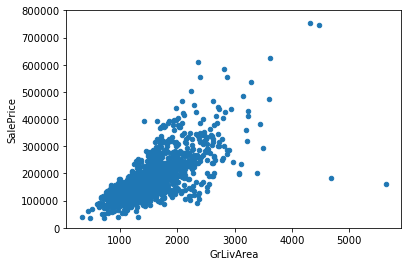

In [5]:
#bivariate analysis saleprice/grlivarea
data = pd.concat([df.SalePrice, df.GrLivArea], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [6]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df.Id == 1299].index)
df = df.drop(df[df.Id == 524].index)